In [1]:
import copy
import pathlib
from typing import Optional, Set
import os.path
import math

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from matplotlib import pyplot as plt
from scipy import stats
from statsmodels.stats import proportion

In [3]:
from drmdp import dataproc

In [4]:
import warnings  # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [5]:
files = tf.io.gfile.glob(
    f"{pathlib.Path.home()}/fs/drmdp/workflows/controljob/agg/1763120034/1763137330/metrics/*.parquet"
)

In [6]:
df_metrics = dataproc.read_data(files, reader="pd")

In [7]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,250,1763120034-0541946b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1166.9694295443726, 1821.786532668395, 1279.3...","[2135, 1038, 980, 687, 1031, 1456, 668, 1973, ...","{'returns': {'mean': 1590.8574759418373, 'std'...",FR
1,250,1763120034-078ace44-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1233.9993188066744, 1226.0556551239783, 911.4...","[207, 72, 45, 663, 364, 1356, 1958, 436, 70, 9...","{'returns': {'mean': 1205.6348442049234, 'std'...",BLADE-TD
2,250,1763120034-0f495b0d-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18194.995057068074, 18930.775810710056, 18965...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18143.385609982528, 'std'...",DMR
3,250,1763120034-03297052-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18927.069956467905, 18822.31747040419, 18976....","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18275.500267493597, 'std'...",DMR
4,250,1763120034-0a5b9c15-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1315.1223026231526, 1236.6400844641971, 1317....","[191, 702, 580, 1660, 263, 350, 314, 3009, 228...","{'returns': {'mean': 1342.2280210041272, 'std'...",FR
...,...,...,...,...,...,...,...
247,420,1763120034-d100f64b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1087.091855966162, 2854.354725581369, 4414.51...","[222, 3602, 10000, 4265, 3816, 7890, 2814, 100...","{'returns': {'mean': 2815.5111304651336, 'std'...",BLADE-TD[N-B]
248,420,1763120034-f6d7bba7-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1065.4797525546705, 1038.6901546594227, 1044....","[427, 849, 68, 1855, 1139, 328, 845, 1025, 14,...","{'returns': {'mean': 976.4654795174813, 'std':...",IMR
249,420,1763120034-f87b4ef1-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[12878.428296760741, 16332.928597073538, 12213...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 14379.725729830892, 'std'...",BLADE-TD
250,420,1763120034-fbc639af-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[16119.556191530583, 16396.892585095524, 16631...","[10000, 10000, 10000, 535, 10000, 1608, 10000,...","{'returns': {'mean': 14640.848488118598, 'std'...",BLADE-TD[N-B]


In [8]:
df_metrics.iloc[0]["meta"]

{'context': {'dummy': 0},
 'exp_id': '1763120034-0541946b-Finite-TC-ShuntDc-v0',
 'instance_id': 14,
 'run_config': {'episodes_per_run': 500,
  'log_episode_frequency': 10,
  'num_runs': 20,
  'output_dir': 'gs://mo-hendrix-ml-workflows-storage/drmdp/workflows/controljob/logs/1763120034/1763120034-0541946b-Finite-TC-ShuntDc-v0/run_14/identity/a43ec355',
  'use_seed': True},
 'env_spec': {'args': {'constraint_violation_reward': -10.0,
   'emit_state': True,
   'max_episode_steps': 10000,
   'penalty_gamma': 1.0,
   'reward_fn': 'pos-enf'},
  'feats_spec': {'args': None, 'name': 'scale'},
  'name': 'Finite-TC-ShuntDc-v0'},
 'epochs': 1,
 'problem_spec': {'delay_config': None,
  'epsilon': 0.1,
  'gamma': 0.99,
  'learning_rate_config': {'args': {'initial_lr': 0.01}, 'name': 'constant'},
  'policy_type': 'markovian',
  'reward_mapper': {'args': None, 'name': 'identity'}},
 'reward_mapper': 'FR',
 'policy_type': 'PP'}

In [9]:
envs = dataproc.get_distinct_envs(df_metrics)

In [10]:
for env_name, args in envs.items():
    print(env_name, args)

Finite-TC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': True, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-TC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-CC-PermExDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': False, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}
Finite-SC-ShuntDc-v0 {'constraint_violation_reward': -10.0, 'emit_state': True, 'max_episode_steps': 10000, 'penalty_gamma': 1.0, 'reward_fn': 'pos-enf'}


In [11]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,250,1763120034-0541946b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1166.9694295443726, 1821.786532668395, 1279.3...","[2135, 1038, 980, 687, 1031, 1456, 668, 1973, ...","{'returns': {'mean': 1590.8574759418373, 'std'...",FR
1,250,1763120034-078ace44-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1233.9993188066744, 1226.0556551239783, 911.4...","[207, 72, 45, 663, 364, 1356, 1958, 436, 70, 9...","{'returns': {'mean': 1205.6348442049234, 'std'...",BLADE-TD
2,250,1763120034-0f495b0d-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18194.995057068074, 18930.775810710056, 18965...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18143.385609982528, 'std'...",DMR
3,250,1763120034-03297052-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18927.069956467905, 18822.31747040419, 18976....","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18275.500267493597, 'std'...",DMR
4,250,1763120034-0a5b9c15-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1315.1223026231526, 1236.6400844641971, 1317....","[191, 702, 580, 1660, 263, 350, 314, 3009, 228...","{'returns': {'mean': 1342.2280210041272, 'std'...",FR
...,...,...,...,...,...,...,...
247,420,1763120034-d100f64b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1087.091855966162, 2854.354725581369, 4414.51...","[222, 3602, 10000, 4265, 3816, 7890, 2814, 100...","{'returns': {'mean': 2815.5111304651336, 'std'...",BLADE-TD[N-B]
248,420,1763120034-f6d7bba7-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1065.4797525546705, 1038.6901546594227, 1044....","[427, 849, 68, 1855, 1139, 328, 845, 1025, 14,...","{'returns': {'mean': 976.4654795174813, 'std':...",IMR
249,420,1763120034-f87b4ef1-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[12878.428296760741, 16332.928597073538, 12213...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 14379.725729830892, 'std'...",BLADE-TD
250,420,1763120034-fbc639af-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[16119.556191530583, 16396.892585095524, 16631...","[10000, 10000, 10000, 535, 10000, 1608, 10000,...","{'returns': {'mean': 14640.848488118598, 'std'...",BLADE-TD[N-B]


In [12]:
sorted(df_metrics["meta"].apply(lambda meta: meta["env_spec"]["name"]).unique())

['Finite-CC-PermExDc-v0',
 'Finite-CC-ShuntDc-v0',
 'Finite-SC-PermExDc-v0',
 'Finite-SC-ShuntDc-v0',
 'Finite-TC-PermExDc-v0',
 'Finite-TC-ShuntDc-v0']

## Comparison: T-Test

In [13]:
PVALUE_THRESHOLD = 0.05

In [14]:
def parse_delay_config(df_input: pd.DataFrame):
    df = copy.deepcopy(df_input)

    def parse_mu(delay_config):
        if delay_config is None:
            return None
        args = delay_config["args"]
        try:
            return args["delay"]
        except KeyError:
            return args["lam"]
        except KeyError as exc:
            raise ValueError(f"Unknown delay config {args}") from exc

    df["delay_type"] = df["delay_config"].apply(lambda dc: dc["name"] if dc else None)
    df["delay_mu"] = df["delay_config"].apply(parse_mu)
    del df["delay_config"]
    return df

In [15]:
def max_episode_filter(df_input):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    env_name = env_spec.apply(lambda spec: spec["name"])
    envs = env_name.unique()
    dfs = []
    for env in envs:
        df_slice = df_input[(env_name == env)]
        df_slice = df_slice[df_slice["episode"] == df_slice["episode"].max()]
        dfs.append(copy.deepcopy(df_slice))
    return pd.concat(dfs)

In [16]:
def filter_envs(df_input, envs: Set[str]):
    env_spec = df_input["meta"].apply(lambda meta: meta["env_spec"])
    mask = env_spec.apply(lambda spec: spec["name"] in envs)
    return copy.deepcopy(df_input[mask])

In [17]:
def extract_salient_meta_fields(df_data: pd.DataFrame):
    df_raw = copy.deepcopy(df_data)

    specs = {
        "env": df_raw["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_raw["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_raw[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    for key in (
        "delay_config",
        "gamma",
    ):
        df_raw[key] = df_raw["meta"].apply(lambda meta: meta["problem_spec"][key])
    return parse_delay_config(df_raw)

In [18]:
def mannwhitney_less_than_test(
    candidate_xs, reference_ys, alpha: float = PVALUE_THRESHOLD
):
    """
    Use for
     - No assumption of Normality
     - Seeds are different for each algorithm
    """
    # stats.ttest_ind
    xs_stat, test_pvalue = stats.mannwhitneyu(
        candidate_xs, reference_ys, alternative="less"
    )
    if test_pvalue < alpha:
        outcome = "Reject H0 (Less than)"
    else:
        outcome = "Fail to reject H0 (Similar)"
    return outcome

In [19]:
def wilcoxon_less_than_test(candidate_xs, reference_ys, alpha=PVALUE_THRESHOLD):
    """
    Use for
     - No assumptions of Normality
     - Used the same seed for each algorithm
    """
    differences = candidate_xs - reference_ys

    non_zero_diffs = differences[differences != 0]
    if len(non_zero_diffs) < 10:
        print(f"Warning: Only {len(non_zero_diffs)} non-zero differences found.")
        print("The test may have low power. This is unusual for episodic returns.")

    # The 'zero_method' handles how to treat zero-differences.
    # 'pratt' is a good default (includes them in ranking),
    # 'wilcox' (default) discards them. Let's use 'pratt'.
    stat, test_pvalue = stats.wilcoxon(
        differences, alternative="less", zero_method="pratt"
    )
    if test_pvalue < alpha:
        outcome = "Reject H0 (Less than)"
    else:
        outcome = "Fail to reject H0 (Similar)"
    return outcome

In [20]:
def ztest(left_pos, left_neg, right_pos, right_neg, alpha=PVALUE_THRESHOLD):
    zstat, test_pvalue = proportion.proportions_ztest(
        count=left_pos,
        nobs=left_pos + left_neg,
        value=right_pos / (right_pos + right_neg),
    )
    if test_pvalue < alpha:
        outcome = "Reject H0 (Different)"
    else:
        outcome = "Fail to reject H0 (Similar)"
    return outcome

In [21]:
def sample_stat_test_method_comparison(df_data, episode: Optional[int] = None):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    df_result = extract_salient_meta_fields(df_result)

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]

    rows = []
    keys = ["env_name", "gamma", "delay_mu"]
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]

    baselines = {}
    for row in df_baseline.to_dict("records"):
        key = tuple(row[key] for key in keys[:-1])
        baselines[key] = row["returns"]

    rows = []
    for row in df_result.to_dict("records"):
        key = tuple([row[key] for key in keys[:-1]])
        full_reward_mean_return = baselines[key]

        test_result = mannwhitney_less_than_test(
            row["returns"], full_reward_mean_return
        )
        row["mannwhitney_less_than_test"] = test_result
        rows.append(row)
    df_test_result = pd.DataFrame(rows)

    # aggreate over algorithm args and reward periods
    agg_keys = ["method", "mannwhitney_less_than_test"]

    df_test_result_agg = (
        df_test_result[agg_keys].value_counts().reset_index().sort_values(agg_keys)
    )

    method_rows = (
        df_test_result_agg.pivot(
            index="method", columns="mannwhitney_less_than_test", values="count"
        )
        .reset_index()
        .to_dict("records")
    )
    df_test_result_agg = pd.DataFrame(method_rows)
    df_test_result_agg["Similarity Ratio"] = rations(df_test_result_agg)

    rows = []
    for left in method_rows:
        for right in method_rows:
            outcome = ztest(
                left_pos=left["Fail to reject H0 (Similar)"],
                left_neg=left["Reject H0 (Less than)"],
                right_pos=right["Fail to reject H0 (Similar)"],
                right_neg=right["Reject H0 (Less than)"],
            )
            row = {
                "left": left["method"],
                "right": right["method"],
                "outcome": outcome,
            }
            rows.append(row)
    df_conf = pd.DataFrame(rows)

    return {"sarsa": df_test_result}, {"sarsa": df_test_result_agg}, {"sarsa": df_conf}

In [22]:
def rations(df):
    df_raw = copy.deepcopy(df)
    df_raw = df_raw.fillna(0)
    return df_raw["Fail to reject H0 (Similar)"] / (
        df_raw["Fail to reject H0 (Similar)"] + df_raw["Reject H0 (Less than)"]
    )

**K=100**

In [23]:
df_test_outcome_k100, df_test_agg_stat_k100, df_test_comparison_k100 = (
    sample_stat_test_method_comparison(df_metrics, episode=100)
)

In [24]:
df_test_outcome_k100["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,100,"[489.84795881839705, 1302.004921549864, 1327.2...","[282, 871, 161, 268, 132, 818, 244, 179, 163, ...","{'returns': {'mean': 1197.3177290971921, 'std'...",BLADE-TD,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,6.0,Reject H0 (Less than)
1,100,"[18805.161284568472, 18950.664475869933, 18913...","[10000, 10000, 10000, 109, 10000, 10000, 10000...","{'returns': {'mean': 16991.091300618304, 'std'...",DMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Reject H0 (Less than)
2,100,"[18903.445672604874, 18712.09753788845, 18871....","[10000, 10000, 10000, 8033, 10000, 10000, 1000...","{'returns': {'mean': 17410.88795669229, 'std':...",DMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,4.0,Reject H0 (Less than)
3,100,"[2071.4345932355745, 17723.461184691776, 11400...","[4227, 10000, 10000, 3400, 464, 1902, 10000, 3...","{'returns': {'mean': 10933.465364446673, 'std'...",BLADE-TD,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,6.0,Fail to reject H0 (Similar)
4,100,"[15992.479170138446, 5951.167774642791, 4940.5...","[10000, 1279, 1897, 10000, 4197, 10000, 10000,...","{'returns': {'mean': 8471.788276077257, 'std':...",BLADE-TD[N-B],Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,100,"[1354.3147111381638, 1392.7434495791824, 41.82...","[997, 385, 279, 864, 977, 640, 1554, 12, 912, ...","{'returns': {'mean': 774.7179067981732, 'std':...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,4.0,Reject H0 (Less than)
212,100,"[1109.2912053672112, 1188.1820538586494, 1225....","[389, 375, 176, 1044, 659, 665, 459, 7, 914, 2...","{'returns': {'mean': 833.2854900534815, 'std':...",IMR,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,4.0,Reject H0 (Less than)
213,100,"[3047.778794200157, 5019.779876903207, 16196.0...","[471, 10000, 10000, 10000, 3190, 10000, 10000,...","{'returns': {'mean': 10050.57256087034, 'std':...",BLADE-TD,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
214,100,"[6669.628478424386, 1095.237362373246, 16685.5...","[10000, 1961, 10000, 10000, 10000, 10000, 1000...","{'returns': {'mean': 11400.136980048628, 'std'...",BLADE-TD[N-B],Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)


In [25]:
df_test_agg_stat_k100["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,37.0,11.0,0.770833
1,BLADE-TD[N-B],29.0,19.0,0.604167
2,DMR,23.0,25.0,0.479167
3,IMR,21.0,27.0,0.437500
4,OP-A,NaN,24.0,0.000000


In [26]:
df_test_comparison_k100["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Reject H0 (Different)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Reject H0 (Different)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Fail to reject H0 (Similar)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


In [27]:
df_test_outcome_k100["sarsa"]["method"].unique()

array(['BLADE-TD', 'DMR', 'BLADE-TD[N-B]', 'OP-A', 'IMR'], dtype=object)

**K=250**

In [28]:
df_test_outcome_k250, df_test_agg_stat_k250, df_test_comparison_k250 = (
    sample_stat_test_method_comparison(df_metrics, episode=300)
)

In [29]:
df_test_outcome_k250["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,300,"[1223.335779727613, 1225.6852714517427, 1238.0...","[505, 117, 317, 1058, 201, 1507, 79, 1667, 669...","{'returns': {'mean': 1210.563109569807, 'std':...",BLADE-TD,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,6.0,Reject H0 (Less than)
1,300,"[18677.55827916418, 18989.588795538297, 18950....","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18283.2680205273, 'std': ...",DMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
2,300,"[18894.21582756886, 18908.79536828439, 18846.3...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18399.7325699727, 'std': ...",DMR,Finite-CC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,4.0,Fail to reject H0 (Similar)
3,300,"[16641.723816852707, 16972.29585211578, 14146....","[2340, 10000, 10000, 10000, 10000, 10000, 1000...","{'returns': {'mean': 13986.061039487726, 'std'...",BLADE-TD,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,6.0,Fail to reject H0 (Similar)
4,300,"[9335.584391886918, 11974.03460347052, 16880.3...","[10000, 10000, 10000, 10000, 10000, 10000, 293...","{'returns': {'mean': 12935.535927040717, 'std'...",BLADE-TD[N-B],Finite-CC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 4.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,300,"[2845.452378291981, 1973.888107659304, 280.015...","[2625, 10000, 721, 8432, 534, 896, 446, 685, 2...","{'returns': {'mean': 1604.9153905759665, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,4.0,Reject H0 (Less than)
212,300,"[1074.0026317082327, 1043.2176169665925, 1098....","[42, 111, 810, 233, 172, 287, 1085, 512, 836, ...","{'returns': {'mean': 956.8066253639736, 'std':...",IMR,Finite-SC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",spliced-tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,4.0,Reject H0 (Less than)
213,300,"[16212.382573578754, 11608.353007276095, 10684...","[10000, 399, 10000, 173, 10000, 155, 10000, 10...","{'returns': {'mean': 13696.232541130772, 'std'...",BLADE-TD,Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,2.0,Fail to reject H0 (Similar)
214,300,"[9463.97581491743, 16503.411561358404, 16115.9...","[10000, 10000, 10000, 10000, 108, 10000, 10000...","{'returns': {'mean': 14039.595114552614, 'std'...",BLADE-TD[N-B],Finite-TC-PermExDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",tiles,{'tiling_dim': 3.0},0.99,clipped-poisson,8.0,Fail to reject H0 (Similar)


In [30]:
df_test_agg_stat_k250["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,40.0,8.0,0.833333
1,BLADE-TD[N-B],35.0,13.0,0.729167
2,DMR,22.0,26.0,0.458333
3,IMR,18.0,30.0,0.375000
4,OP-A,NaN,24.0,0.000000


In [31]:
df_test_comparison_k250["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Fail to reject H0 (Similar)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Fail to reject H0 (Similar)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


**K = Max(K)**

In [32]:
df_metrics

,episode,exp_id,meta,returns,steps,metrics,method
0,250,1763120034-0541946b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1166.9694295443726, 1821.786532668395, 1279.3...","[2135, 1038, 980, 687, 1031, 1456, 668, 1973, ...","{'returns': {'mean': 1590.8574759418373, 'std'...",FR
1,250,1763120034-078ace44-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1233.9993188066744, 1226.0556551239783, 911.4...","[207, 72, 45, 663, 364, 1356, 1958, 436, 70, 9...","{'returns': {'mean': 1205.6348442049234, 'std'...",BLADE-TD
2,250,1763120034-0f495b0d-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18194.995057068074, 18930.775810710056, 18965...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18143.385609982528, 'std'...",DMR
3,250,1763120034-03297052-Finite-CC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[18927.069956467905, 18822.31747040419, 18976....","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 18275.500267493597, 'std'...",DMR
4,250,1763120034-0a5b9c15-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1315.1223026231526, 1236.6400844641971, 1317....","[191, 702, 580, 1660, 263, 350, 314, 3009, 228...","{'returns': {'mean': 1342.2280210041272, 'std'...",FR
...,...,...,...,...,...,...,...
247,420,1763120034-d100f64b-Finite-TC-ShuntDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1087.091855966162, 2854.354725581369, 4414.51...","[222, 3602, 10000, 4265, 3816, 7890, 2814, 100...","{'returns': {'mean': 2815.5111304651336, 'std'...",BLADE-TD[N-B]
248,420,1763120034-f6d7bba7-Finite-SC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[1065.4797525546705, 1038.6901546594227, 1044....","[427, 849, 68, 1855, 1139, 328, 845, 1025, 14,...","{'returns': {'mean': 976.4654795174813, 'std':...",IMR
249,420,1763120034-f87b4ef1-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[12878.428296760741, 16332.928597073538, 12213...","[10000, 10000, 10000, 10000, 10000, 10000, 100...","{'returns': {'mean': 14379.725729830892, 'std'...",BLADE-TD
250,420,1763120034-fbc639af-Finite-TC-PermExDc-v0,"{'context': {'dummy': 0}, 'exp_id': '176312003...","[16119.556191530583, 16396.892585095524, 16631...","[10000, 10000, 10000, 535, 10000, 1608, 10000,...","{'returns': {'mean': 14640.848488118598, 'std'...",BLADE-TD[N-B]


In [33]:
df_test_outcome_kmax, df_test_agg_stat_kmax, df_test_comparison_kmax = (
    sample_stat_test_method_comparison(df_metrics)
)

In [34]:
df_test_outcome_kmax["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,490,"[5810.747344790255, 516.8171373791005, 5731.94...","[10000, 600, 10000, 10000, 87, 1879, 10000, 42...","{'returns': {'mean': 3099.2738238497736, 'std'...",IMR,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,2.0,Reject H0 (Less than)
1,490,"[1215.0598272992077, 1327.1400181812432, 1495....","[853, 712, 1353, 393, 404, 1178, 827, 380, 142...","{'returns': {'mean': 1255.7731441387818, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
2,490,"[1453.3507084870405, 366.0504224733138, 1475.2...","[649, 260, 488, 810, 880, 383, 764, 211, 464, ...","{'returns': {'mean': 1038.8665765095152, 'std'...",IMR,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
3,490,"[1467.5654836729066, 869.9224301629691, 1154.0...","[464, 548, 734, 255, 1227, 1332, 42, 913, 296,...","{'returns': {'mean': 1287.2880623642307, 'std'...",BLADE-TD,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
4,490,"[1456.3652387091613, 916.7981743152593, 1422.8...","[606, 592, 1565, 469, 825, 577, 818, 142, 1470...","{'returns': {'mean': 1243.3115626360093, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,490,"[3119.339424956145, 1354.142695563782, 3180.83...","[2341, 495, 2450, 775, 1682, 664, 772, 1952, 5...","{'returns': {'mean': 2469.982519057549, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Reject H0 (Less than)
212,490,"[427.08633679746754, 372.37810330041344, 1306....","[833, 409, 1365, 960, 2793, 648, 915, 671, 685...","{'returns': {'mean': 886.8745171156461, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
213,490,"[1141.8638996918503, 897.8964786761574, 1132.0...","[1372, 931, 84, 519, 538, 1448, 457, 632, 1040...","{'returns': {'mean': 1153.8730260694833, 'std'...",BLADE-TD[N-B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)
214,490,"[1312.6939993723724, 1323.1597064917428, 1281....","[1344, 810, 745, 805, 795, 539, 618, 645, 1394...","{'returns': {'mean': 1192.0909172206757, 'std'...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)


In [35]:
df_test_agg_stat_kmax["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,42.0,6.0,0.875000
1,BLADE-TD[N-B],32.0,16.0,0.666667
2,DMR,20.0,28.0,0.416667
3,IMR,22.0,26.0,0.458333
4,OP-A,NaN,24.0,0.000000


In [36]:
def format_agg_stat(df_input: pd.DataFrame):
    df_raw = copy.deepcopy(df_input)
    for col in df_raw.columns:
        if "H0" in col:
            df_raw[col] = df_raw[col].fillna(0).astype(np.int64)
        if "Ratio" in col:
            df_raw[col] = (
                df_raw[col]
                .apply(lambda el: np.around(el * 100, decimals=2))
                .astype(str)
            )
    return df_raw

In [37]:
print(
    format_agg_stat(df_test_agg_stat_kmax["sarsa"]).to_latex(escape=False, index=False)
)

\begin{tabular}{lrrl}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) & Similarity Ratio \\
\midrule
BLADE-TD & 42 & 6 & 87.5 \\
BLADE-TD[N-B] & 32 & 16 & 66.67 \\
DMR & 20 & 28 & 41.67 \\
IMR & 22 & 26 & 45.83 \\
OP-A & 0 & 24 & 0.0 \\
\bottomrule
\end{tabular}



In [38]:
print(df_test_agg_stat_kmax["sarsa"].to_markdown(index=False))

| method        |   Fail to reject H0 (Similar) |   Reject H0 (Less than) |   Similarity Ratio |
|:--------------|------------------------------:|------------------------:|-------------------:|
| BLADE-TD      |                            42 |                       6 |           0.875    |
| BLADE-TD[N-B] |                            32 |                      16 |           0.666667 |
| DMR           |                            20 |                      28 |           0.416667 |
| IMR           |                            22 |                      26 |           0.458333 |
| OP-A          |                           nan |                      24 |           0        |


In [39]:
df_test_comparison_kmax["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Reject H0 (Different)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Reject H0 (Different)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


## Env Split


### Electric Motor Control

In [40]:
df_test_outcome_gem, df_test_agg_stat_gem, df_test_comparison_gem = (
    sample_stat_test_method_comparison(
        filter_envs(
            df_metrics,
            envs=set(
                [
                    "Finite-CC-PermExDc-v0",
                    "Finite-CC-ShuntDc-v0",
                    "Finite-SC-PermExDc-v0",
                    "Finite-SC-ShuntDc-v0",
                    "Finite-TC-PermExDc-v0",
                    "Finite-TC-ShuntDc-v0",
                ]
            ),
        )
    )
)

In [41]:
df_test_outcome_gem["sarsa"]

,episode,returns,steps,metrics,method,env_name,env_args,feats_name,feats_args,gamma,delay_type,delay_mu,mannwhitney_less_than_test
0,490,"[5810.747344790255, 516.8171373791005, 5731.94...","[10000, 600, 10000, 10000, 87, 1879, 10000, 42...","{'returns': {'mean': 3099.2738238497736, 'std'...",IMR,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,2.0,Reject H0 (Less than)
1,490,"[1215.0598272992077, 1327.1400181812432, 1495....","[853, 712, 1353, 393, 404, 1178, 827, 380, 142...","{'returns': {'mean': 1255.7731441387818, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Reject H0 (Less than)
2,490,"[1453.3507084870405, 366.0504224733138, 1475.2...","[649, 260, 488, 810, 880, 383, 764, 211, 464, ...","{'returns': {'mean': 1038.8665765095152, 'std'...",IMR,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
3,490,"[1467.5654836729066, 869.9224301629691, 1154.0...","[464, 548, 734, 255, 1227, 1332, 42, 913, 296,...","{'returns': {'mean': 1287.2880623642307, 'std'...",BLADE-TD,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
4,490,"[1456.3652387091613, 916.7981743152593, 1422.8...","[606, 592, 1565, 469, 825, 577, 818, 142, 1470...","{'returns': {'mean': 1243.3115626360093, 'std'...",BLADE-TD[N-B],Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,490,"[3119.339424956145, 1354.142695563782, 3180.83...","[2341, 495, 2450, 775, 1682, 664, 772, 1952, 5...","{'returns': {'mean': 2469.982519057549, 'std':...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,0.99,clipped-poisson,6.0,Reject H0 (Less than)
212,490,"[427.08633679746754, 372.37810330041344, 1306....","[833, 409, 1365, 960, 2793, 648, 915, 671, 685...","{'returns': {'mean': 886.8745171156461, 'std':...",IMR,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,6.0,Reject H0 (Less than)
213,490,"[1141.8638996918503, 897.8964786761574, 1132.0...","[1372, 931, 84, 519, 538, 1448, 457, 632, 1040...","{'returns': {'mean': 1153.8730260694833, 'std'...",BLADE-TD[N-B],Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)
214,490,"[1312.6939993723724, 1323.1597064917428, 1281....","[1344, 810, 745, 805, 795, 539, 618, 645, 1394...","{'returns': {'mean': 1192.0909172206757, 'std'...",BLADE-TD,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,1.00,clipped-poisson,4.0,Fail to reject H0 (Similar)


In [42]:
df_test_agg_stat_gem["sarsa"]

,method,Fail to reject H0 (Similar),Reject H0 (Less than),Similarity Ratio
0,BLADE-TD,42.0,6.0,0.875000
1,BLADE-TD[N-B],32.0,16.0,0.666667
2,DMR,20.0,28.0,0.416667
3,IMR,22.0,26.0,0.458333
4,OP-A,NaN,24.0,0.000000


In [43]:
print(df_test_agg_stat_gem["sarsa"].to_latex(escape=False, index=False))

\begin{tabular}{lrrr}
\toprule
method & Fail to reject H0 (Similar) & Reject H0 (Less than) & Similarity Ratio \\
\midrule
BLADE-TD & 42.000000 & 6.000000 & 0.875000 \\
BLADE-TD[N-B] & 32.000000 & 16.000000 & 0.666667 \\
DMR & 20.000000 & 28.000000 & 0.416667 \\
IMR & 22.000000 & 26.000000 & 0.458333 \\
OP-A & NaN & 24.000000 & 0.000000 \\
\bottomrule
\end{tabular}



In [44]:
df_test_comparison_gem["sarsa"]

,left,right,outcome
0,BLADE-TD,BLADE-TD,Fail to reject H0 (Similar)
1,BLADE-TD,BLADE-TD[N-B],Reject H0 (Different)
2,BLADE-TD,DMR,Reject H0 (Different)
3,BLADE-TD,IMR,Reject H0 (Different)
4,BLADE-TD,OP-A,Fail to reject H0 (Similar)
5,BLADE-TD[N-B],BLADE-TD,Reject H0 (Different)
6,BLADE-TD[N-B],BLADE-TD[N-B],Fail to reject H0 (Similar)
7,BLADE-TD[N-B],DMR,Reject H0 (Different)
8,BLADE-TD[N-B],IMR,Reject H0 (Different)
9,BLADE-TD[N-B],OP-A,Fail to reject H0 (Similar)


## Error Analysis

In [45]:
def error_cases(df_input, method):
    worse_result_mask = df_input["mannwhitney_less_than_test"].apply(
        lambda result: result == "Reject H0 (Less than)"
    )
    method_mask = df_input["method"] == method
    df_slice = copy.deepcopy(df_input[worse_result_mask & method_mask])
    df_result = (
        df_slice[["env_name", "gamma", "delay_mu", "method"]]
        .value_counts()
        .reset_index()
    )
    return df_result.sort_values(["env_name", "gamma", "delay_mu"])

In [46]:
error_cases(df_test_outcome_kmax["sarsa"], "DMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,2.0,DMR,1
1,Finite-CC-PermExDc-v0,0.99,4.0,DMR,1
26,Finite-CC-PermExDc-v0,0.99,6.0,DMR,1
25,Finite-CC-PermExDc-v0,0.99,8.0,DMR,1
24,Finite-CC-PermExDc-v0,1.00,4.0,DMR,1
23,Finite-CC-PermExDc-v0,1.00,8.0,DMR,1
22,Finite-SC-PermExDc-v0,0.99,2.0,DMR,1
21,Finite-SC-PermExDc-v0,0.99,4.0,DMR,1
20,Finite-SC-PermExDc-v0,0.99,6.0,DMR,1
19,Finite-SC-PermExDc-v0,1.00,2.0,DMR,1


In [47]:
error_cases(df_test_outcome_kmax["sarsa"], "IMR")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-PermExDc-v0,0.99,4.0,IMR,1
1,Finite-CC-PermExDc-v0,0.99,6.0,IMR,1
24,Finite-CC-PermExDc-v0,0.99,8.0,IMR,1
23,Finite-CC-ShuntDc-v0,0.99,2.0,IMR,1
22,Finite-CC-ShuntDc-v0,0.99,4.0,IMR,1
21,Finite-CC-ShuntDc-v0,0.99,6.0,IMR,1
20,Finite-CC-ShuntDc-v0,0.99,8.0,IMR,1
19,Finite-SC-PermExDc-v0,0.99,2.0,IMR,1
18,Finite-SC-PermExDc-v0,0.99,4.0,IMR,1
17,Finite-SC-PermExDc-v0,0.99,6.0,IMR,1


In [48]:
error_cases(df_test_outcome_kmax["sarsa"], "OP-S")

,env_name,gamma,delay_mu,method,count


In [49]:
error_cases(df_test_outcome_kmax["sarsa"], "BLADE-TD[N-B]")

,env_name,gamma,delay_mu,method,count
0,Finite-CC-ShuntDc-v0,0.99,4.0,BLADE-TD[N-B],1
1,Finite-CC-ShuntDc-v0,0.99,6.0,BLADE-TD[N-B],1
2,Finite-CC-ShuntDc-v0,1.00,2.0,BLADE-TD[N-B],1
3,Finite-SC-PermExDc-v0,0.99,6.0,BLADE-TD[N-B],1
4,Finite-SC-PermExDc-v0,0.99,8.0,BLADE-TD[N-B],1
5,Finite-SC-ShuntDc-v0,0.99,2.0,BLADE-TD[N-B],1
6,Finite-SC-ShuntDc-v0,0.99,4.0,BLADE-TD[N-B],1
7,Finite-SC-ShuntDc-v0,0.99,6.0,BLADE-TD[N-B],1
8,Finite-SC-ShuntDc-v0,0.99,8.0,BLADE-TD[N-B],1
9,Finite-TC-ShuntDc-v0,0.99,2.0,BLADE-TD[N-B],1


In [50]:
error_cases(df_test_outcome_kmax["sarsa"], "BLADE-TD")

,env_name,gamma,delay_mu,method,count
0,Finite-SC-PermExDc-v0,0.99,6.0,BLADE-TD,1
1,Finite-SC-ShuntDc-v0,0.99,6.0,BLADE-TD,1
2,Finite-SC-ShuntDc-v0,0.99,8.0,BLADE-TD,1
3,Finite-TC-ShuntDc-v0,0.99,2.0,BLADE-TD,1
4,Finite-TC-ShuntDc-v0,1.00,6.0,BLADE-TD,1
5,Finite-TC-ShuntDc-v0,1.00,8.0,BLADE-TD,1


## 95 CI

### 95 CI Tables

In [51]:
def flatten_results(df_data, gamma: float, episode: Optional[int] = None):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in (
        "delay_config",
        "gamma",
    ):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[(df_result["gamma"] == gamma)]

    # (env/level)  x (algorithm/algorithm_args) x reward period
    del df_result["meta"]
    del df_result["exp_id"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})
    return df_result

In [52]:
df_flat_gamma1 = flatten_results(df_metrics, gamma=1.0)

In [53]:
df_flat_gamma1

,episode,returns,steps,metrics,method,gamma,env_name,env_args,feats_name,feats_args,delay_type,delay
251,490,1435.183953,"[1468, 1267, 558, 511, 962, 527, 613, 590, 125...","{'returns': {'mean': 1316.6183412816604, 'std'...",BLADE-TD,1.0,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
251,490,1177.777823,"[1468, 1267, 558, 511, 962, 527, 613, 590, 125...","{'returns': {'mean': 1316.6183412816604, 'std'...",BLADE-TD,1.0,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
251,490,1502.668087,"[1468, 1267, 558, 511, 962, 527, 613, 590, 125...","{'returns': {'mean': 1316.6183412816604, 'std'...",BLADE-TD,1.0,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
251,490,819.421319,"[1468, 1267, 558, 511, 962, 527, 613, 590, 125...","{'returns': {'mean': 1316.6183412816604, 'std'...",BLADE-TD,1.0,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
251,490,1216.743829,"[1468, 1267, 558, 511, 962, 527, 613, 590, 125...","{'returns': {'mean': 1316.6183412816604, 'std'...",BLADE-TD,1.0,Finite-TC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37,490,127.914857,"[126, 48, 17, 40, 22, 83, 243, 14, 52, 32, 29,...","{'returns': {'mean': 121.32865609237959, 'std'...",OP-A,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,4.0
37,490,117.479434,"[126, 48, 17, 40, 22, 83, 243, 14, 52, 32, 29,...","{'returns': {'mean': 121.32865609237959, 'std'...",OP-A,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,4.0
37,490,155.437086,"[126, 48, 17, 40, 22, 83, 243, 14, 52, 32, 29,...","{'returns': {'mean': 121.32865609237959, 'std'...",OP-A,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,4.0
37,490,111.83185,"[126, 48, 17, 40, 22, 83, 243, 14, 52, 32, 29,...","{'returns': {'mean': 121.32865609237959, 'std'...",OP-A,1.0,Finite-SC-ShuntDc-v0,"{'constraint_violation_reward': -10.0, 'emit_s...",scale,None,clipped-poisson,4.0


In [54]:
def calc_ci(xs, confidence: float, method: str = "auto"):
    if method not in ("auto", "t-distribution", "normal"):
        raise ValueError("Method must be one of: {auto, t-distribution, normal}")

    # calculate mean
    mean = np.mean(xs)
    # standard error
    std_err = stats.sem(xs)

    if (method == "auto" and len(xs) < 30) or method == "t-distribution":
        form = "t-distribution"
        lb, ub = stats.t.interval(
            confidence=confidence, df=len(xs) - 1, loc=mean, scale=std_err
        )
    else:
        form = "normal"
        lb, ub = stats.norm.interval(confidence=confidence, loc=mean, scale=std_err)

    ci = np.abs(ub - mean)
    return {"ub": ub, "lb": lb, "mean": mean, "ci": ci, "ci_method": form}

In [55]:
calc_ci(np.random.rand(100), confidence=0.95)

{'ub': 0.5383997092067188,
 'lb': 0.41957373072692167,
 'mean': 0.47898671996682024,
 'ci': 0.05941298923989852,
 'ci_method': 'normal'}

In [56]:
# calculate for each env x method (across delays)

In [57]:
def algo_ci(df_results: pd.DataFrame, confidence: float) -> pd.DataFrame:
    """
    Calculate for each env x method (across delays)
    """
    envs = sorted(df_results["env_name"].unique())
    methods = sorted(df_results["method"].unique())

    rows = []
    for env in envs:
        for method in methods:
            df_slice = df_results[
                (df_results["env_name"] == env) & (df_results["method"] == method)
            ]

            ci_result = calc_ci(
                df_slice["returns"].values, confidence=confidence, method="auto"
            )
            ci_fmt = " ± ".join(
                [
                    str(np.around(ci_result["mean"], 2)),
                    str(np.around(ci_result["ci"], 2)),
                ]
            )
            row = {"env_name": env, "method": method, "ci_fmt": ci_fmt, **ci_result}
            rows.append(row)
    return pd.DataFrame(rows)

In [58]:
df_gamma1_ci95 = algo_ci(df_flat_gamma1, confidence=0.95)

In [59]:
df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,BLADE-TD,BLADE-TD[N-B],DMR,IMR,OP-A
env_name,,,,,
Finite-CC-PermExDc-v0,10821.49 ± 566.8,11128.75 ± 462.8,8290.66 ± 1308.97,11822.84 ± 405.07,297.84 ± 86.6
Finite-CC-ShuntDc-v0,17817.65 ± 166.86,17782.85 ± 172.25,17173.25 ± 862.34,17911.85 ± 131.31,7934.5 ± 583.78
Finite-SC-PermExDc-v0,1264.55 ± 15.54,1266.08 ± 14.15,1135.77 ± 95.67,1195.18 ± 26.87,201.05 ± 18.93
Finite-SC-ShuntDc-v0,1188.41 ± 34.28,1183.19 ± 36.86,754.19 ± 157.21,952.57 ± 82.18,111.68 ± 9.99
Finite-TC-PermExDc-v0,11393.87 ± 351.83,11497.46 ± 272.84,8570.77 ± 973.04,11002.75 ± 341.95,272.11 ± 77.35
Finite-TC-ShuntDc-v0,1289.68 ± 51.83,1293.95 ± 52.34,768.49 ± 166.19,1043.22 ± 91.13,137.06 ± 12.89


In [60]:
print(
    df_gamma1_ci95.pivot(index="env_name", columns="method", values="ci_fmt").to_latex()
)

\begin{tabular}{llllll}
\toprule
method & BLADE-TD & BLADE-TD[N-B] & DMR & IMR & OP-A \\
env_name &  &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 10821.49 ± 566.8 & 11128.75 ± 462.8 & 8290.66 ± 1308.97 & 11822.84 ± 405.07 & 297.84 ± 86.6 \\
Finite-CC-ShuntDc-v0 & 17817.65 ± 166.86 & 17782.85 ± 172.25 & 17173.25 ± 862.34 & 17911.85 ± 131.31 & 7934.5 ± 583.78 \\
Finite-SC-PermExDc-v0 & 1264.55 ± 15.54 & 1266.08 ± 14.15 & 1135.77 ± 95.67 & 1195.18 ± 26.87 & 201.05 ± 18.93 \\
Finite-SC-ShuntDc-v0 & 1188.41 ± 34.28 & 1183.19 ± 36.86 & 754.19 ± 157.21 & 952.57 ± 82.18 & 111.68 ± 9.99 \\
Finite-TC-PermExDc-v0 & 11393.87 ± 351.83 & 11497.46 ± 272.84 & 8570.77 ± 973.04 & 11002.75 ± 341.95 & 272.11 ± 77.35 \\
Finite-TC-ShuntDc-v0 & 1289.68 ± 51.83 & 1293.95 ± 52.34 & 768.49 ± 166.19 & 1043.22 ± 91.13 & 137.06 ± 12.89 \\
\bottomrule
\end{tabular}



Slicing for high delay problems

In [61]:
algo_ci(df_flat_gamma1[df_flat_gamma1["delay"] > 2], confidence=0.95).pivot(
    index="env_name", columns="method", values="ci_fmt"
)

method,BLADE-TD,BLADE-TD[N-B],DMR,IMR,OP-A
env_name,,,,,
Finite-CC-PermExDc-v0,10962.27 ± 635.81,10986.17 ± 577.77,7699.73 ± 1585.2,11924.73 ± 450.86,520.62 ± 110.55
Finite-CC-ShuntDc-v0,17770.94 ± 213.07,17846.08 ± 177.87,16817.38 ± 1125.06,17975.31 ± 140.06,6099.01 ± 190.45
Finite-SC-PermExDc-v0,1267.73 ± 14.95,1265.84 ± 17.39,1127.62 ± 126.41,1210.44 ± 28.87,167.65 ± 11.7
Finite-SC-ShuntDc-v0,1183.95 ± 40.73,1173.48 ± 43.64,784.28 ± 191.57,967.56 ± 94.36,121.33 ± 7.81
Finite-TC-PermExDc-v0,11393.8 ± 439.97,11520.26 ± 313.79,8032.42 ± 1222.66,11090.9 ± 368.37,466.39 ± 102.95
Finite-TC-ShuntDc-v0,1280.7 ± 62.3,1282.44 ± 57.06,865.33 ± 201.1,1018.36 ± 107.34,140.67 ± 9.03


In [62]:
df_flat_gamma099 = flatten_results(df_metrics, gamma=0.99)

In [63]:
df_gamma099_ci95 = algo_ci(df_flat_gamma099, confidence=0.95)

In [64]:
df_gamma099_ci95.pivot(index="env_name", columns="method", values="ci_fmt")

method,BLADE-TD,BLADE-TD[N-B],DMR,IMR,OP-A
env_name,,,,,
Finite-CC-PermExDc-v0,14067.47 ± 410.69,14579.19 ± 417.93,7173.96 ± 1242.48,12242.22 ± 437.11,312.17 ± 86.35
Finite-CC-ShuntDc-v0,18242.46 ± 79.21,18109.69 ± 111.73,18099.55 ± 572.98,16887.25 ± 144.73,7886.93 ± 584.12
Finite-SC-PermExDc-v0,1196.85 ± 14.9,1198.2 ± 13.17,967.25 ± 84.77,965.14 ± 24.62,202.03 ± 31.06
Finite-SC-ShuntDc-v0,2670.76 ± 135.81,2348.19 ± 156.15,817.3 ± 145.22,2563.56 ± 385.46,79.57 ± 5.66
Finite-TC-PermExDc-v0,14626.69 ± 298.56,14750.34 ± 305.67,9361.79 ± 914.3,12347.96 ± 328.35,234.84 ± 62.4
Finite-TC-ShuntDc-v0,4493.84 ± 326.01,3744.31 ± 372.44,792.81 ± 158.22,2984.61 ± 493.1,88.12 ± 6.25


In [65]:
print(
    df_gamma099_ci95.pivot(
        index="env_name", columns="method", values="ci_fmt"
    ).to_latex()
)

\begin{tabular}{llllll}
\toprule
method & BLADE-TD & BLADE-TD[N-B] & DMR & IMR & OP-A \\
env_name &  &  &  &  &  \\
\midrule
Finite-CC-PermExDc-v0 & 14067.47 ± 410.69 & 14579.19 ± 417.93 & 7173.96 ± 1242.48 & 12242.22 ± 437.11 & 312.17 ± 86.35 \\
Finite-CC-ShuntDc-v0 & 18242.46 ± 79.21 & 18109.69 ± 111.73 & 18099.55 ± 572.98 & 16887.25 ± 144.73 & 7886.93 ± 584.12 \\
Finite-SC-PermExDc-v0 & 1196.85 ± 14.9 & 1198.2 ± 13.17 & 967.25 ± 84.77 & 965.14 ± 24.62 & 202.03 ± 31.06 \\
Finite-SC-ShuntDc-v0 & 2670.76 ± 135.81 & 2348.19 ± 156.15 & 817.3 ± 145.22 & 2563.56 ± 385.46 & 79.57 ± 5.66 \\
Finite-TC-PermExDc-v0 & 14626.69 ± 298.56 & 14750.34 ± 305.67 & 9361.79 ± 914.3 & 12347.96 ± 328.35 & 234.84 ± 62.4 \\
Finite-TC-ShuntDc-v0 & 4493.84 ± 326.01 & 3744.31 ± 372.44 & 792.81 ± 158.22 & 2984.61 ± 493.1 & 88.12 ± 6.25 \\
\bottomrule
\end{tabular}



### 95 CI Plots

In [66]:
METHODS_PALETTES = {
    key: palette for key, palette in zip(dataproc.ORDERED_METHODS, sns.color_palette())
}

In [67]:
def export_figure(
    figure, name: str, format: str = "pdf", dpi=300, transparent: bool = True
):
    # to be able to save, we must plot
    base_dir = os.path.dirname(name)
    if not os.path.exists(base_dir):
        tf.io.gfile.makedirs(base_dir)
    figure.savefig(f"{name}.{format}", dpi=dpi, format=format, transparent=transparent)

In [68]:
def plot_return_ci(
    df_data,
    gamma: float,
    suffix: str,
    output_dir: str = "figures/95ci",
    episode: Optional[int] = None,
):
    if episode is not None:
        df_result = copy.deepcopy(df_data[df_data["episode"] == episode])
    else:
        df_result = max_episode_filter(df_data)

    for key in (
        "delay_config",
        "gamma",
    ):
        df_result[key] = df_result["meta"].apply(lambda meta: meta["problem_spec"][key])

    specs = {
        "env": df_result["meta"].apply(lambda meta: meta["env_spec"]),
        "feats": df_result["meta"].apply(lambda meta: meta["env_spec"]["feats_spec"]),
    }

    for prefix, col_fam in specs.items():
        for col in ("name", "args"):
            df_result[f"{prefix}_{col}"] = col_fam.apply(lambda spec: spec[col])

    df_result = df_result[(df_result["gamma"] == gamma)]

    # (env/level)  x (algorithm/algorithm_args) x reward period -> which method is the winner
    del df_result["meta"]
    del df_result["exp_id"]

    df_result = parse_delay_config(df_result)
    df_baseline = df_result[pd.isnull(df_result["delay_type"])]
    df_result = df_result[~pd.isnull(df_result["delay_type"])]
    baseline_dfs = []
    distinct_algo_configs = df_result[["delay_type", "delay_mu"]].drop_duplicates()

    # Replicate baseline results for each config
    # to make plotting easier.
    for row in distinct_algo_configs.to_dict("records"):
        print(row)
        df_baseline_rp = copy.deepcopy(df_baseline)
        # reward period is one
        df_baseline_rp["delay_type"] = row["delay_type"]
        df_baseline_rp["delay_mu"] = row["delay_mu"]
        baseline_dfs.append(df_baseline_rp)
    df_result = pd.concat(baseline_dfs + [df_result], axis=0)
    df_result = df_result.sort_values(["method", "delay_type", "delay_mu"])
    df_result = df_result.explode("returns")
    df_result = df_result.rename(columns={"delay_mu": "delay"})

    envs = sorted(df_result["env_name"].unique())
    nrows = 3
    ncols = math.ceil(len(envs) / nrows)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4 * ncols, 4 * nrows))
    for ax, env in zip(axes.flatten(), envs):
        df_plot = df_result[df_result["env_name"] == env]
        sns.pointplot(
            data=df_plot,
            x="delay",
            y="returns",
            hue="method",
            dodge=True,
            errorbar=("ci", 95),
            palette=METHODS_PALETTES,
            ax=ax,
        )
        title = f"{env}, $\gamma={gamma}$"
        ax.set_title(title)
    fig.tight_layout()
    name_prefix = "_".join([str(token) for token in ["95ci", gamma]])
    export_figure(fig, os.path.join(output_dir, f"{name_prefix}_{suffix}"))

{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}


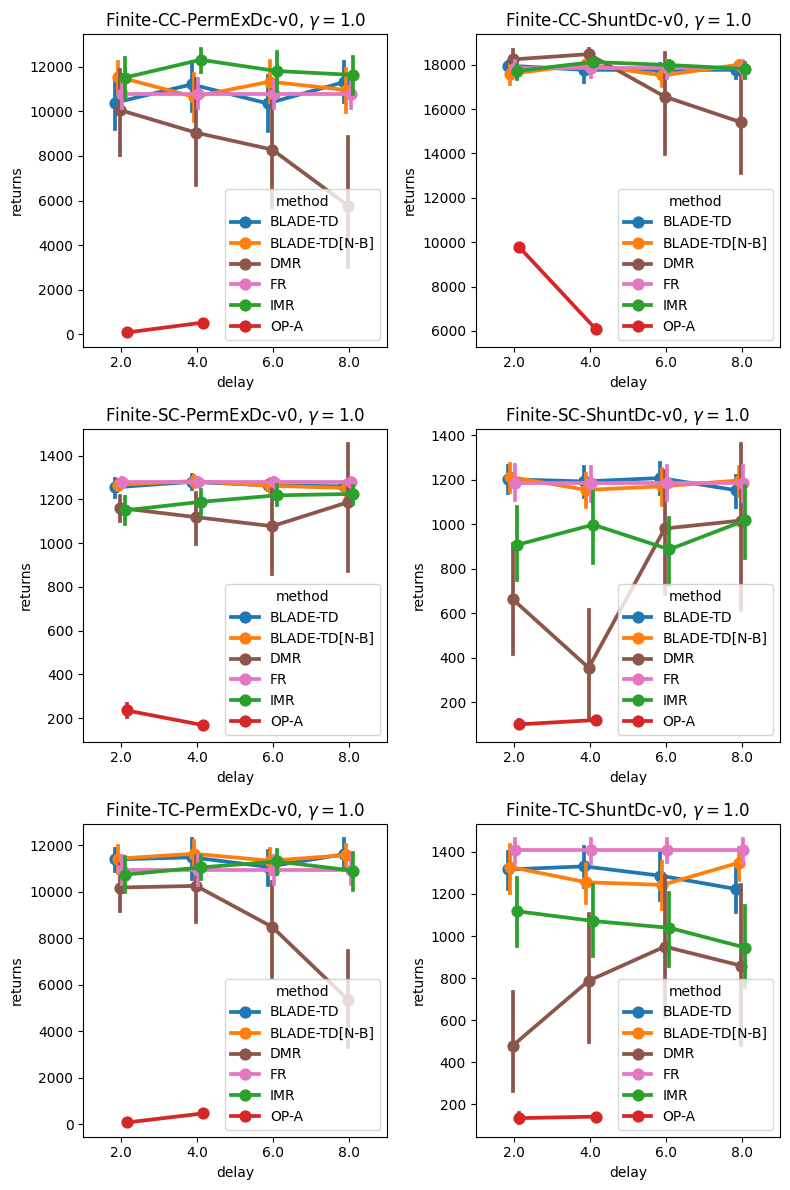

In [69]:
plot_return_ci(df_metrics, gamma=1.0, suffix="sarsa")

{'delay_type': 'clipped-poisson', 'delay_mu': 2.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 6.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 8.0}
{'delay_type': 'clipped-poisson', 'delay_mu': 4.0}


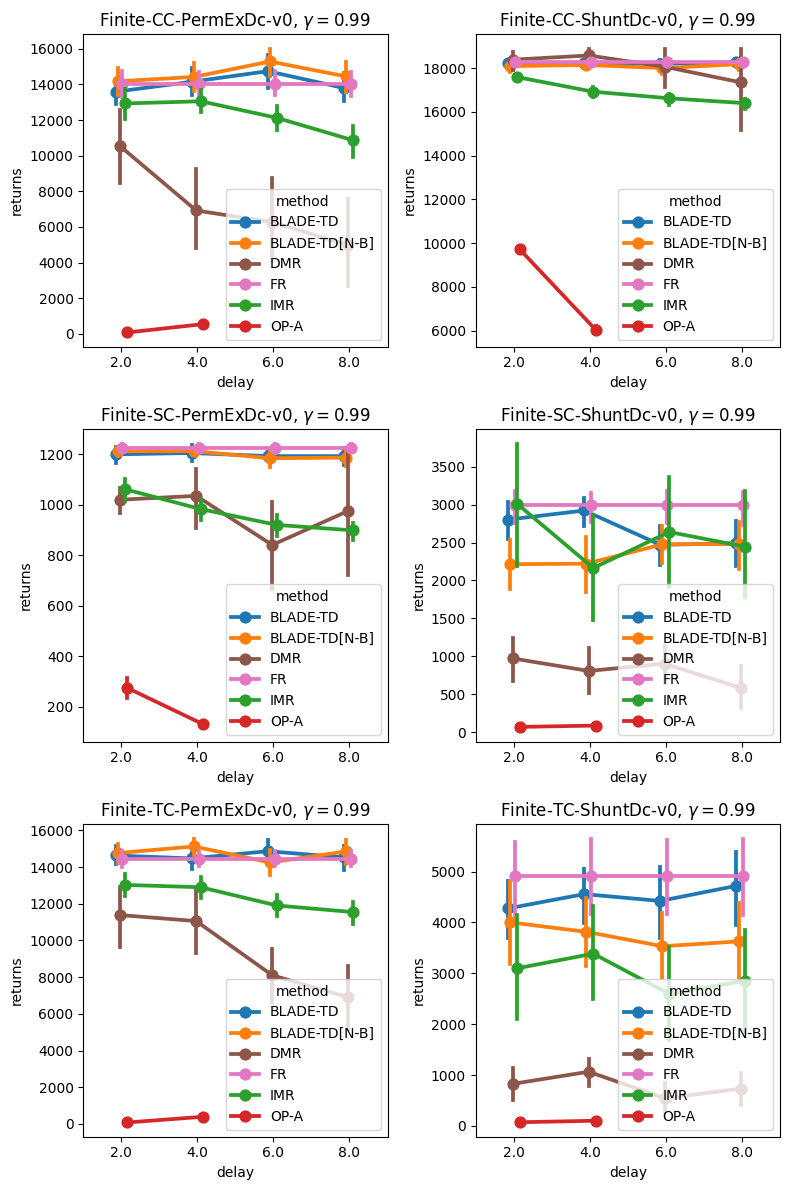

In [70]:
plot_return_ci(df_metrics, gamma=0.99, suffix="sarsa")

## Sample distributions

In [71]:
def plot_sample_dist(df_data, num_samples: int = 2):
    df_slice = max_episode_filter(df_data)
    df_slice = df_slice[["method", "meta", "returns"]]
    df_raw = copy.deepcopy(df_slice)
    methods = sorted(df_raw["method"].unique())

    fig, axes = plt.subplots(
        nrows=len(methods),
        ncols=num_samples,
        figsize=(4 * num_samples, 4 * len(methods)),
    )
    for row, method in enumerate(methods):
        df_algomethod = df_raw[(df_raw["method"] == method)]
        df_samples = df_algomethod.sample(n=num_samples)
        for idx in range(num_samples):
            ax = axes[row, idx]
            sample = df_samples.iloc[idx]
            miu = np.round(np.mean(sample["returns"]), decimals=2)
            sns.histplot(sample["returns"], ax=ax)
            title_template = " ".join(
                [
                    method,
                    "$\mu$ =",
                    str(miu),
                ]
            )
            ax.set_title(title_template)

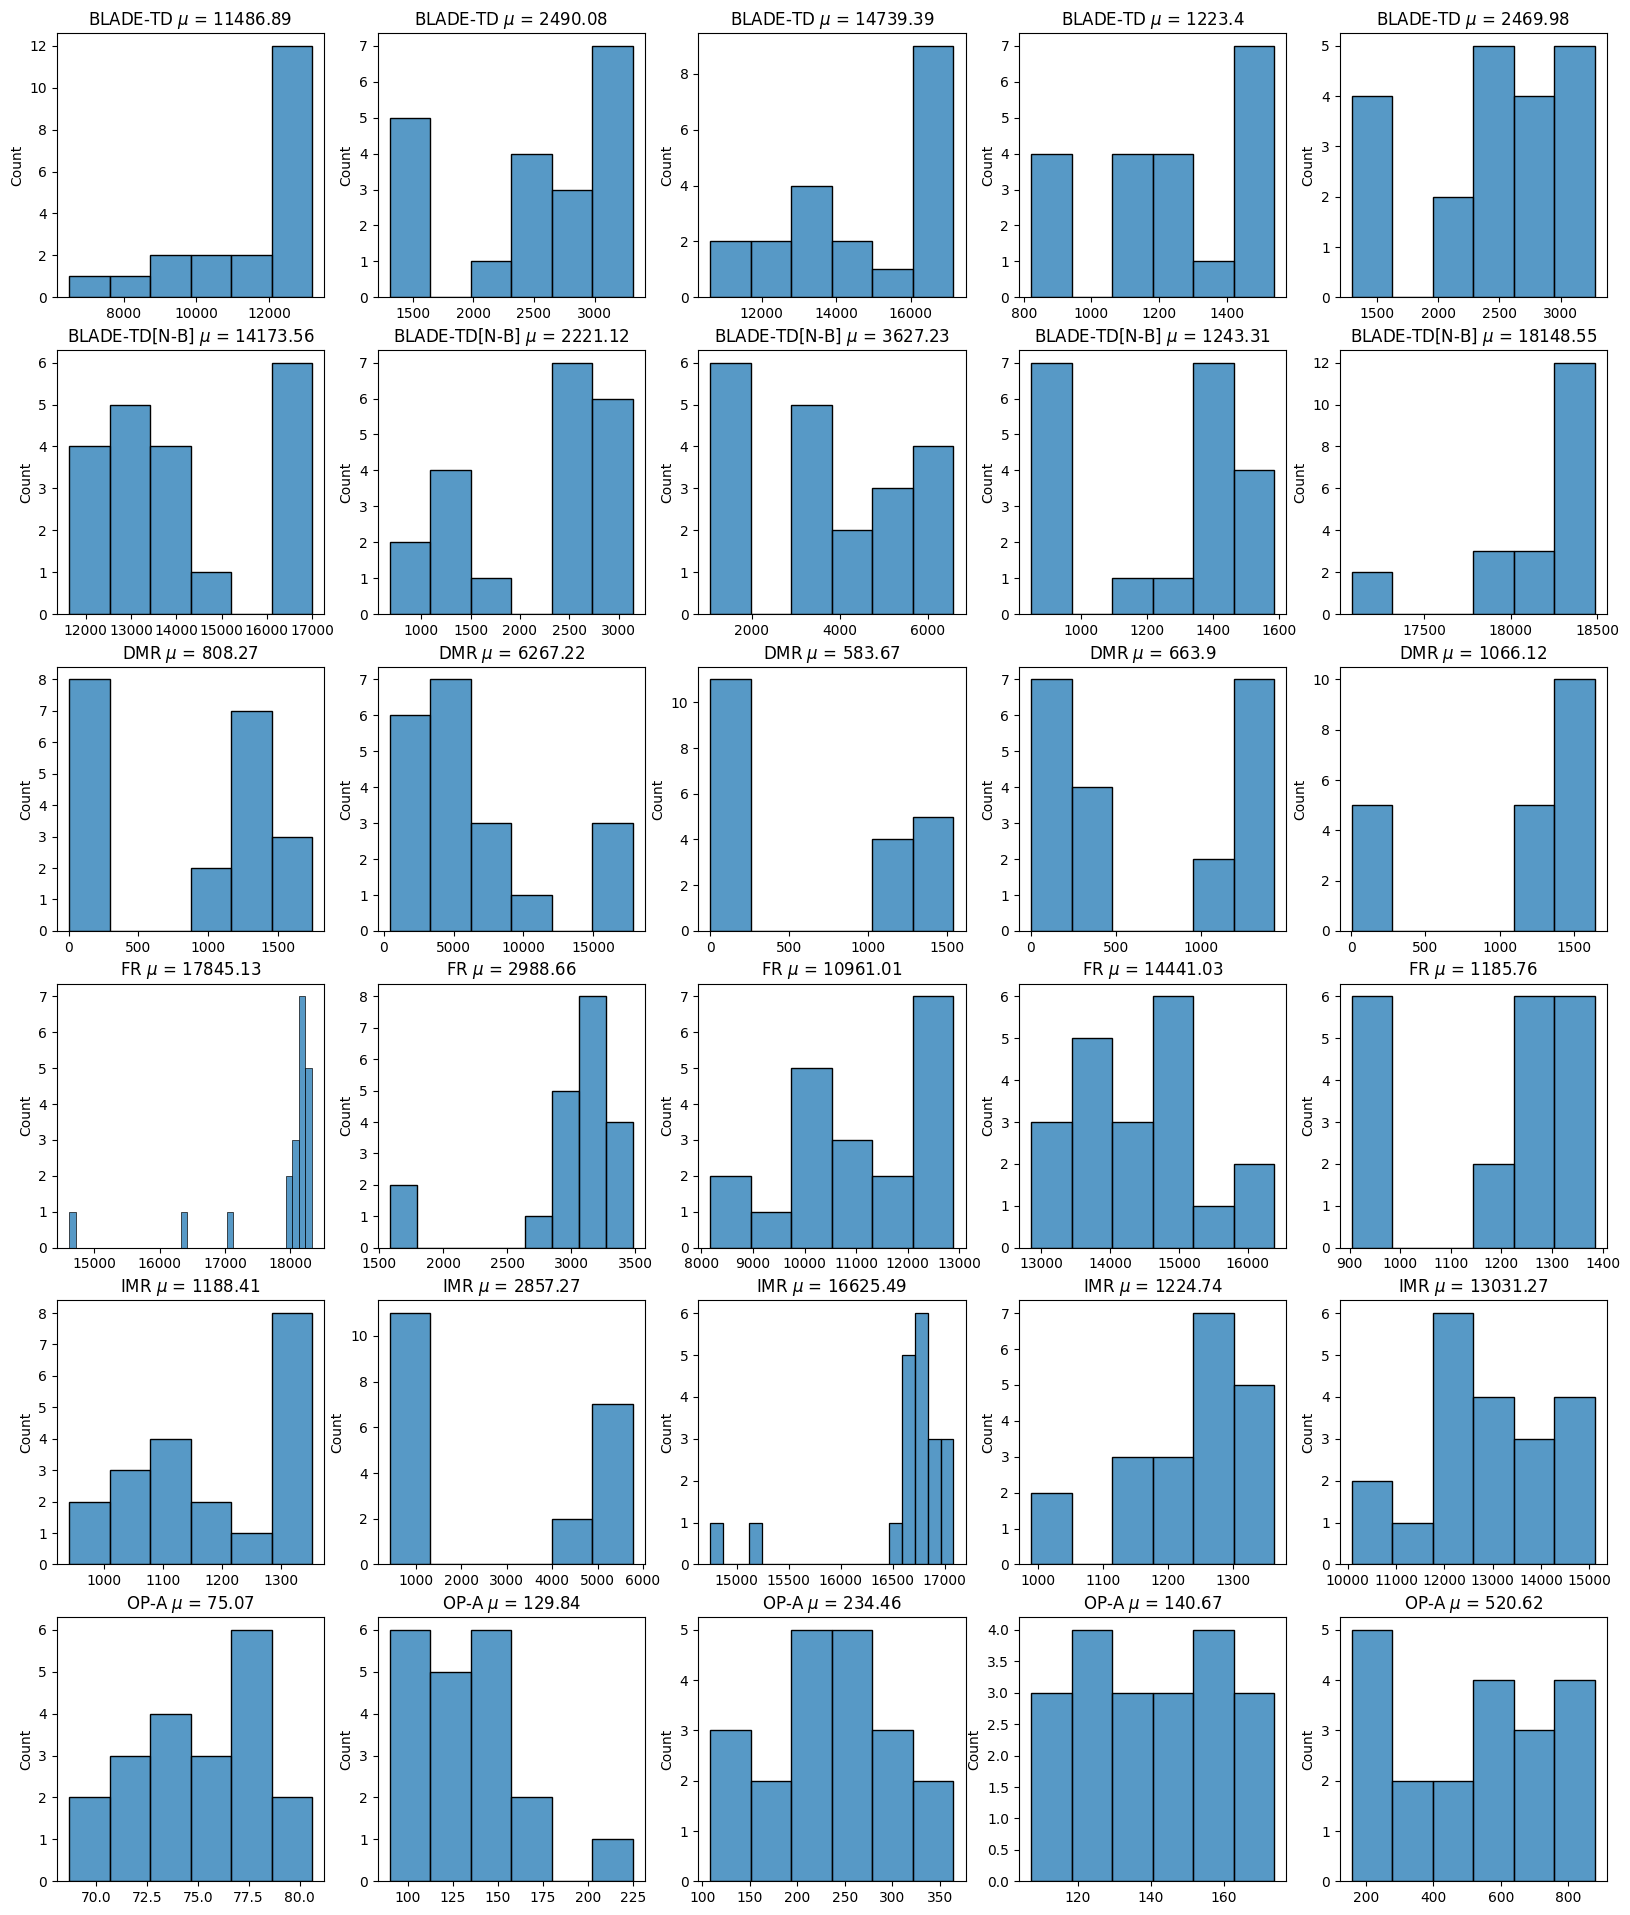

In [72]:
plot_sample_dist(df_metrics, 5)